In [1]:
import pandas as pd
import arviz as az
import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Process: 10 tosses of coin, 7 heads and 3 tails. Head:1, tail:0

In [2]:
tosses = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

df = pd.DataFrame(tosses, columns=["Outcomes"])
df.value_counts()

Outcomes
1           7
0           3
Name: count, dtype: int64

In [3]:
prior_prob=df.value_counts()[1]/len(tosses)

In [4]:
basic_model = pm.Model()

with basic_model:

    # Parameter for prior, the sigma is 0.05 because we are so sure that a coin toss have a probability 0.05 to land on head
    p = pm.Normal('p', mu=0.5, sigma=0.05)

    # Likelihood
    posterior_prob = pm.Bernoulli("Posterior", p=p, observed=tosses)

In [5]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\scalar\basic.py:3054: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(x)
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\tensor\elemwise.py:781: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\scalar\basic.py:3054: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(x)
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\tensor\elemwise.py:781: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\scalar\basic.py:3054: RuntimeWarning: invalid value encountered in log1p
  return np.log1p(x)
C:\Users\user\anaconda3\envs\tes\Lib\site-packages\pytensor\tensor\ele

Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 10 seconds.


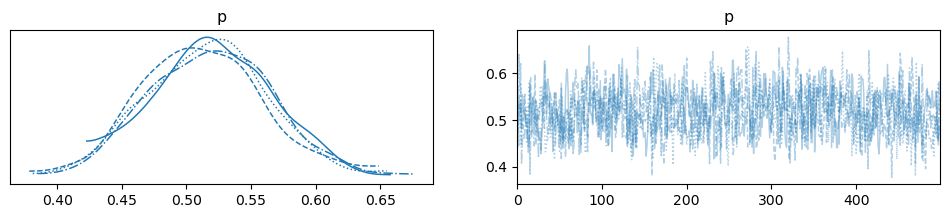

In [6]:
with basic_model:
    az.plot_trace(trace);

In [7]:
with basic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.52,0.05,0.44,0.61,0.0,0.0,714.49,1272.45,1.01


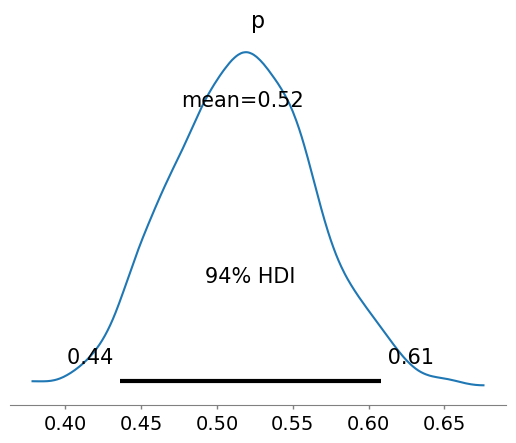

In [8]:
with basic_model:
    az.plot_posterior(trace);